<a href="https://colab.research.google.com/github/CheimaHMM/computer-vision/blob/main/fashion_MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Imports**

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
import numpy as np

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Flatten, Activation,Dropout, MaxPooling2D, BatchNormalization, Input

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

## **Data exploration and preprocessing**

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
print('shapes:\ntrain :',x_train.shape,'\ntest :',x_test.shape)

shapes:
train : (60000, 28, 28) 
test : (10000, 28, 28)


In [ ]:
y_train.shape

(60000,)

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## **Modeling**

**Simple CNN**

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10,activation = 'softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 13s 4ms/step - loss: 2.3388 - accuracy: 0.8300 - val_loss: 0.4379 - val_accuracy: 0.8630
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3186 - accuracy: 0.8917 - val_loss: 0.4073 - val_accuracy: 0.8719
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2615 - accuracy: 0.9081 - val_loss: 0.4360 - val_accuracy: 0.8654
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2328 - accuracy: 0.9171 - val_loss: 0.4472 - val_accuracy: 0.8657
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2112 - accuracy: 0.9246 - val_loss: 0.4611 - val_accuracy: 0.8696
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1973 - accuracy: 0.9298 - val_loss: 0.4997 - val_accuracy: 0.8622
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1856 - accuracy: 0.9330 - val_loss: 0.5099 - val_accuracy: 0.8654
Epoch

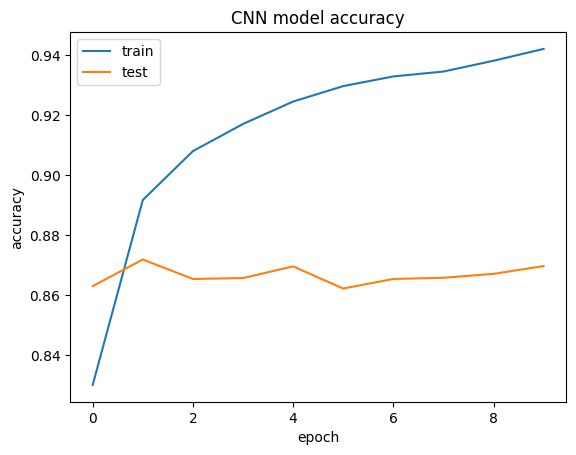

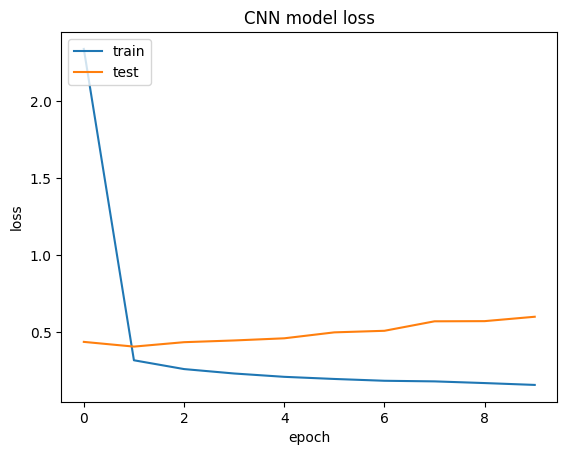

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

**VGG**

`custom VGG`



In [ ]:
from keras.applications import VGG16
from keras.layers import Input, Conv2D, Flatten, Dense, Dropout, MaxPooling2D

#simplified VGG-like model
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Epoch 1/10
469/469 [==============================] - 11s 18ms/step - loss: 0.6662 - accuracy: 0.8139 - val_loss: 0.3175 - val_accuracy: 0.8860
Epoch 2/10
469/469 [==============================] - 8s 17ms/step - loss: 0.3122 - accuracy: 0.8872 - val_loss: 0.2833 - val_accuracy: 0.8943
Epoch 3/10
469/469 [==============================] - 8s 16ms/step - loss: 0.2632 - accuracy: 0.9045 - val_loss: 0.2657 - val_accuracy: 0.9034
Epoch 4/10
469/469 [==============================] - 8s 17ms/step - loss: 0.2338 - accuracy: 0.9145 - val_loss: 0.2476 - val_accuracy: 0.9121
Epoch 5/10
469/469 [==============================] - 8s 17ms/step - loss: 0.2156 - accuracy: 0.9213 - val_loss: 0.2354 - val_accuracy: 0.9121
Epoch 6/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1980 - accuracy: 0.9255 - val_loss: 0.2330 - val_accuracy: 0.9154
Epoch 7/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1794 - accuracy: 0.9335 - val_loss: 0.2254 - val_accuracy: 0.923

In [ ]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_VGG = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

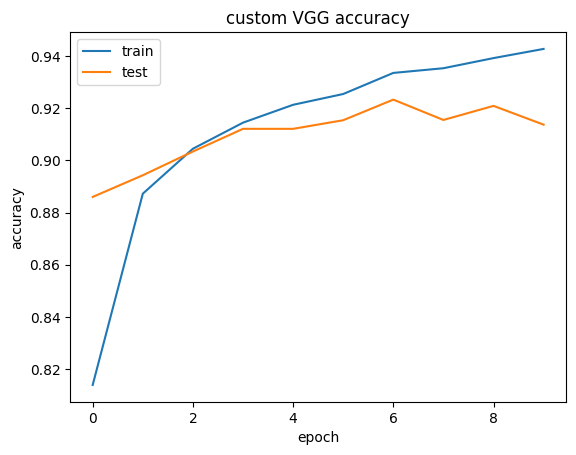

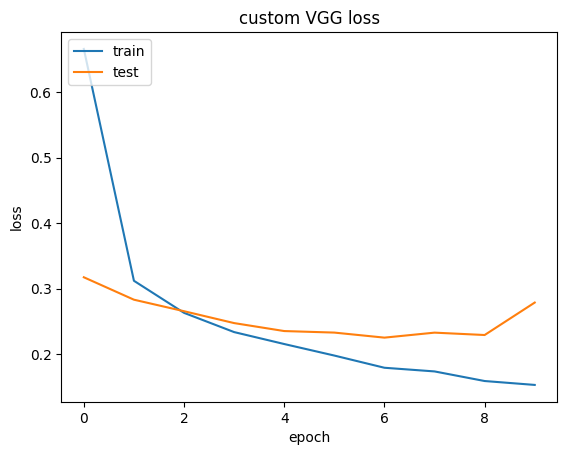

In [ ]:
plt.plot(history_VGG.history['accuracy'])
plt.plot(history_VGG.history['val_accuracy'])
plt.title('custom VGG accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history_VGG.history['loss'])
plt.plot(history_VGG.history['val_loss'])
plt.title('custom VGG loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

`fine-tuning VGG16`

In [ ]:
# padding : VGG16 accepts a minimum input image shape of (32,32,3). Since our MNIST fashion images are (28,28,1), we have to add some
# paddings to them.

In [ ]:
x_train_padded = []
x_test_padded = []
for img in x_train :
  img = np.pad(img,((2,2),(2,2)),mode='constant', constant_values=0)
  x_train_padded.append(img)

for img in x_test :
  img = np.pad(img,((2,2),(2,2)),mode='constant', constant_values=0)
  x_test_padded.append(img)


In [ ]:
# Load the pre-trained VGG16 model without the top classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Create a custom model by adding new top layers to the pre-trained base
model_VGG16 = Sequential()
model_VGG16.add(Conv2D(3, (1, 1), padding='same', input_shape=(32, 32, 1)))
model_VGG16.add(base_model)
model_VGG16.add(Flatten())
model_VGG16.add(Dense(256, activation='relu'))
model_VGG16.add(Dense(10, activation='softmax'))

# Compile the model
model_VGG16.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
x_train_padded = np.array(x_train_padded)
x_test_padded = np.array(x_test_padded)
print(x_train_padded.shape, x_test_padded.shape)

(60000, 32, 32) (10000, 32, 32)


In [ ]:
history_VGG16 = model_VGG16.fit(x_train_padded,y_train, validation_data=(x_test_padded, y_test), epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 35s 58ms/step - loss: 1.3477 - accuracy: 0.5375 - val_loss: 0.6006 - val_accuracy: 0.7605
Epoch 2/10
469/469 [==============================] - 25s 54ms/step - loss: 0.4768 - accuracy: 0.8210 - val_loss: 0.4118 - val_accuracy: 0.8500
Epoch 3/10
469/469 [==============================] - 25s 53ms/step - loss: 0.3821 - accuracy: 0.8621 - val_loss: 0.3412 - val_accuracy: 0.8778
Epoch 4/10
469/469 [==============================] - 25s 53ms/step - loss: 0.3206 - accuracy: 0.8847 - val_loss: 0.3498 - val_accuracy: 0.8777
Epoch 5/10
469/469 [==============================] - 25s 54ms/step - loss: 0.2926 - accuracy: 0.8942 - val_loss: 0.3084 - val_accuracy: 0.8905
Epoch 6/10
469/469 [==============================] - 25s 54ms/step - loss: 0.2709 - accuracy: 0.9033 - val_loss: 0.3480 - val_accuracy: 0.8798
Epoch 7/10
469/469 [==============================] - 25s 54ms/step - loss: 0.2574 - accuracy: 0.9076 - val_loss: 0.2940 - val_accuracy:

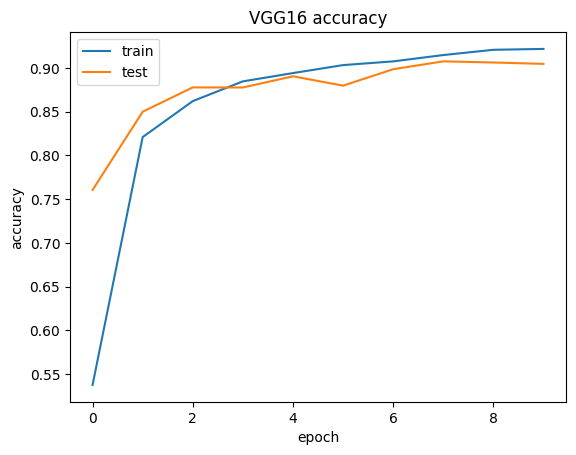

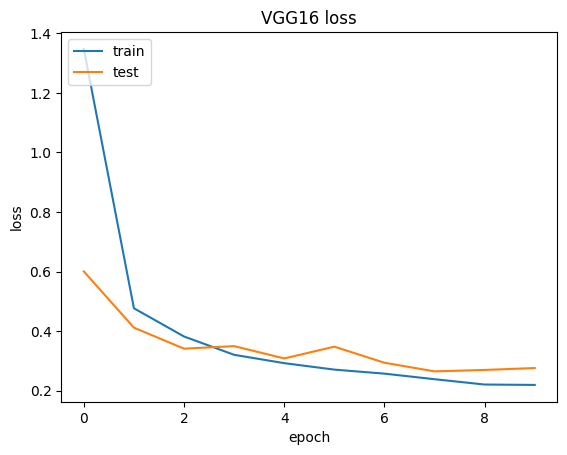

In [ ]:
plt.plot(history_VGG16.history['accuracy'])
plt.plot(history_VGG16.history['val_accuracy'])
plt.title('VGG16 accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history_VGG16.history['loss'])
plt.plot(history_VGG16.history['val_loss'])
plt.title('VGG16 loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

********************************************************************************
# **Prediction**

In [ ]:
img_to_pred = x_test[2]
img_to_pred_reshaped = np.reshape(img_to_pred,(1,28,28))
img_pred = model.predict(img_to_pred_reshaped)

1/1 [==============================] - 0s 95ms/step


predicted : 1 
real : 9


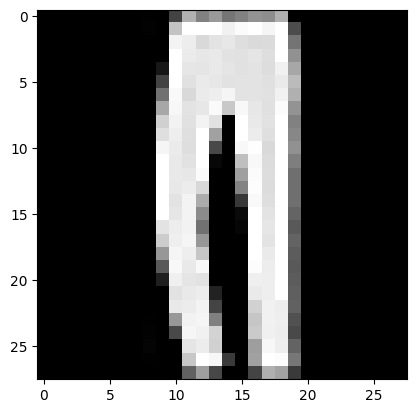

In [ ]:
prediction = np.argmax(img_pred)
plt.imshow(img_to_pred, cmap='gray')
print('predicted :',prediction,'\nreal :',y_test[0])

********************************************************************************
# **Intermediate layers results**

In [ ]:
model_VGG16.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 3)         6         
                                                                 
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14848592 (56.64 MB)
Trainable params: 14848592 (56.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1/1 [==============================] - 0s 143ms/step


ValueError: ignored

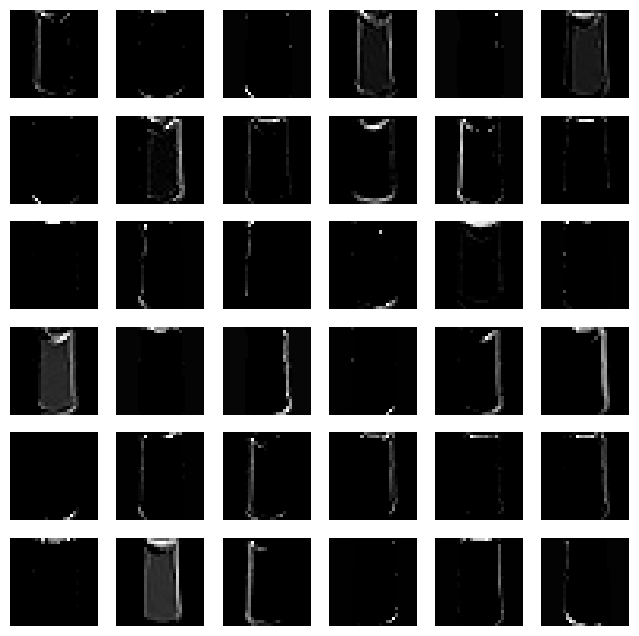

In [ ]:

from keras.models import Model

# Définir la couche dont vous souhaitez visualiser les activations intermédiaires
layer_name = 'conv2d_1'  # Nom de la couche que vous souhaitez visualiser

# Créer un modèle intermédiaire pour obtenir les sorties de la couche sélectionnée
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# Obtenir les activations intermédiaires pour une image d'exemple
example_image = x_train[2]  # Sélectionner une seule image pour l'exemple
example_image = np.reshape(example_image,(1,28,28))
activations = intermediate_layer_model.predict(example_image)

# Afficher les activations sous forme de cartes de chaleur
plt.figure(figsize=(8, 8))
for i in range(activations.shape[-1]):
    plt.subplot(6, 6, i + 1)
    plt.imshow(activations[0, :, :, i], cmap='gray')
    plt.axis('off')

plt.imshow(x_train[2],cmap='gray')
plt.show()